# Корреляционный анализ доходностей AAPL

В этом ноутбуке вычисляется автокорреляция доходностей r_t = close_t − close_{t−1} для инструмента AAPL по лагам от 1 до 31, строятся графики ACF и делается краткий вывод о значимых лагах.


In [15]:
import sys, os
from pathlib import Path

cwd = Path.cwd()
sys.path.insert(0, str(cwd))
sys.path.insert(0, str(cwd.parent))


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from spb_test.statistics.statistics import compute_simple_returns, autocorrelation



In [17]:
path = '../data/ohlc_AAPL.csv'
df = pd.read_csv(path)

for name in ('time', 'open_time'):
    if name in df.columns:
        df[name] = pd.to_datetime(df[name], errors='coerce')
        df = df.sort_values(name, kind='stable')
        break

close = pd.to_numeric(df['close'], errors='coerce')
returns = compute_simple_returns(close)
print(f"Rows: {len(df)}, returns: {len(returns)}")


Rows: 250, returns: 249


In [18]:
lags = list(range(1, 32))
acf_values = []
for lag in lags:
    r = autocorrelation(returns, lag)
    acf_values.append(r)

acf_series = pd.Series(acf_values, index=lags)
acf_series.head()


1    0.050374
2    0.135916
3   -0.109311
4   -0.099533
5   -0.081510
dtype: float64

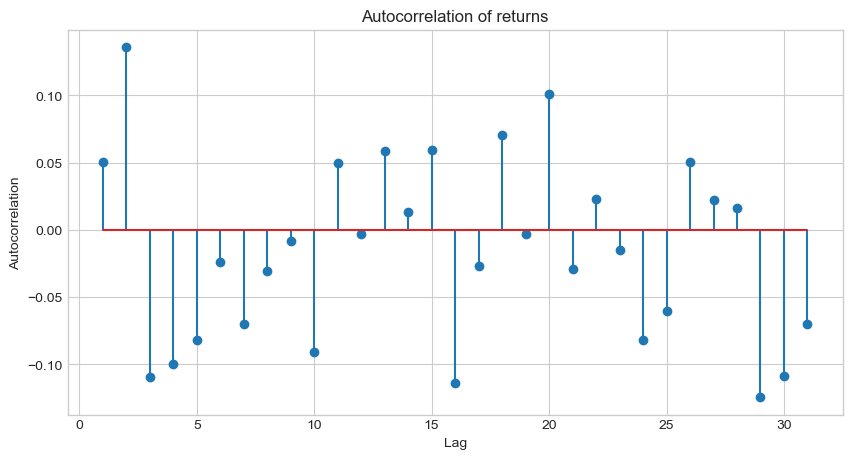

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(lags, acf_series.values)
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation of returns')
plt.show()


### Вывод

Рынок AAPL выглядит эффективным — доходности близки к случайному процессу, автокорреляция не выявляет статистически устойчивых зависимостей, что соответствует гипотезе эффективного рынка
